### EDA (Exploratory Data Analysis) : 탐색적 자료분석
데이터 분석에 있어 가장 초기 분석 단계이며 가장 중요함.

데이터수집 -> 데이터 전처리 -> 순수데이터 -> EDA -> AI

1. 데이터의 다양한 패턴 발견
2. 데이터의 잠재적인 문제를 발견
3. 자료수집을 위한 기반 (자료수집이 추가로 필요한지)
4. 적절한 분석 모델 제시

#### EDA 의 대상

- 단변량 : EDA를 통해 파악하려는 변수 1개 -> 데이터를 설명하고 패턴을 찾는 것이 목적
- 다변량 : EDA를 통해 파악하려는 변수 여러개 -> 변수 간의 관계를 보는 것이 목적

#### EDA 의 목적
- 데이터 자료의 요약과 그래프 기법을 활용하여 자료의 구조 및 패턴을 파악
- 분석한 데이터와 방향성을 토대로 기업의 신상품, 마케팅, 상품 수정 등의 제안을 실행할 수 있다.

#### EDA의 종류
- 시각화 : 차트, 그림등을 활용하여 가독성 높은 데이터로 설득이 가능
- 비시각화 : 반드시 그래픽 요소를 활용할 필요 없음. 수치 데이터(통계량)을 활용하여 데이터 확인 가능

#### EDA의 순서
1. 전체적인 데이터 분석 -> 분석의 목적과 목적에 맞는 변수는 무엇인지, 데이터 검증(이상치, 결측치, 오류 등), 분포
2. 데이터의 개별 속성값 관찰 ->  개별 데이터가 전체적인 흐름과 특이사항의 연관성, 시각화 &비시각화를 통한 데이터 검증
3. 속성 간의 관계 파악 -> 개별 속성(2번)에서 찾아내지 못한 조합, 패턴 발견 (관계분석)

#### EDA의 분석 특징
- 저항성 : 데이터의 손상, 오류 , 이상치 등에게 적게 영향을 받아야 한다. 1,2,3,4,20 평균 : 6, 중앙값 :3  
        (중앙값이 평균보다 중요하게 사용됨. 중앙값이 이상치에 영향 받지 않기 떄문)
- 잔차해석 : 관찰 값들이 주 분포에서 얼마나 벗어나는지 분석해야함.
- 자료의 재표현 : 스케일링과 같이 다른 방식(로그,제곱,역수 등)으로 데이터 표현
- 자료의 시각적 표현 : 데이터의 숨겨진 정보들을 파악하기 위해 다양한 그래프 사용

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc
import numpy as np
import seaborn as sns
import warnings

rc('font',family='AppleGothic')
rc('axes',unicode_minus=False)
warnings.filterwarnings('ignore')

In [205]:
df = pd.read_csv('nyc_citibike.csv')
df

,start_date,end_date,start_hour,end_hour,trip_duration,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,usertype,birth_year,gender,day_since_register
0,2018-05-01,2018-05-01,4,4,390,3002,South End Ave & Liberty St,40.711512,-74.015756,79,Franklin St & W Broadway,40.719116,-74.006667,21105,Subscriber,1945,male,36
1,2018-05-01,2018-05-01,1,1,854,3611,Vernon Blvd & 47 Rd,40.744907,-73.953457,3572,34 Ave & 38 St,40.756913,-73.921631,32219,Subscriber,1998,male,29
2,2018-05-01,2018-05-01,4,4,526,515,W 43 St & 10 Ave,40.760094,-73.994618,388,W 26 St & 10 Ave,40.749718,-74.002950,33433,Subscriber,1954,male,55
3,2018-05-01,2018-05-01,3,3,885,3641,Broadway & W 25 St,40.742869,-73.989186,336,Sullivan St & Washington Sq,40.730477,-73.999061,32028,Subscriber,1963,male,32
4,2018-05-01,2018-05-01,1,1,324,3440,Fulton St & Adams St,40.692418,-73.989495,3308,Kane St & Clinton St,40.686176,-73.996453,26425,Subscriber,1965,male,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72030,2018-05-01,2018-05-01,23,23,207,3452,Bayard St & Leonard St,40.719156,-73.948854,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,16883,Subscriber,1994,female,12
72031,2018-05-01,2018-05-01,23,23,356,151,Cleveland Pl & Spring St,40.722104,-73.997249,319,Fulton St & Broadway,40.711066,-74.009447,17406,Subscriber,1994,male,21
72032,2018-05-01,2018-05-01,22,23,516,526,E 33 St & 5 Ave,40.747659,-73.984907,435,W 21 St & 6 Ave,40.741740,-73.994156,29964,Subscriber,1975,male,37
72033,2018-05-01,2018-05-01,22,23,427,379,W 31 St & 7 Ave,40.749156,-73.991600,477,W 41 St & 8 Ave,40.756405,-73.990026,20511,Subscriber,1972,male,14


In [16]:
df.shape

(72035, 18)

In [18]:
df.isnull().sum()

start_date                 0
end_date                   0
start_hour                 0
end_hour                   0
trip_duration              0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
usertype                   0
birth_year                 0
gender                     0
day_since_register         0
dtype: int64

In [26]:
pd.DataFrame(data=df.isnull().sum()/len(df),columns=['null ration'])
# 결측치 비율

,null ration
start_date,0.0
end_date,0.0
start_hour,0.0
end_hour,0.0
trip_duration,0.0
start_station_id,0.0
start_station_name,0.0
start_station_latitude,0.0
start_station_longitude,0.0
end_station_id,0.0


In [30]:
df.dtypes

start_date                  object
end_date                    object
start_hour                   int64
end_hour                     int64
trip_duration                int64
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
usertype                    object
birth_year                   int64
gender                      object
day_since_register           int64
dtype: object

In [32]:
# 단변량 분석
# 평균 trip_duration은 얼마인지
# 가장 대여건수가 많은 시간은 언제인지
# 유저들의 성별분포는 어떨까
# 유저들이 나이분포는 어떨까

In [34]:
# 다변량 가설
# 신규 가입자 들이 한번 탈때, 더 짧게 쓰지 않을까?
# 새벽 시간이면 짧은거리를 쓰지 않을까?
# 성별이나 태어난년도에 따라 주행거리가 다르지 않을까?

In [42]:
df['trip_duration_min']=df['trip_duration']/60
df['trip_duration_min'].describe()

count    72035.000000
mean        17.445851
std        135.661662
min          1.016667
25%          6.633333
50%         11.350000
75%         20.016667
max      22407.700000
Name: trip_duration_min, dtype: float64

가장 적게 빌린 시간은 1분, 편균시간 17분이며 최대값은 22407분인 것을 보아 이상치가 데이터에 포함되어있음을 알 수 있음.

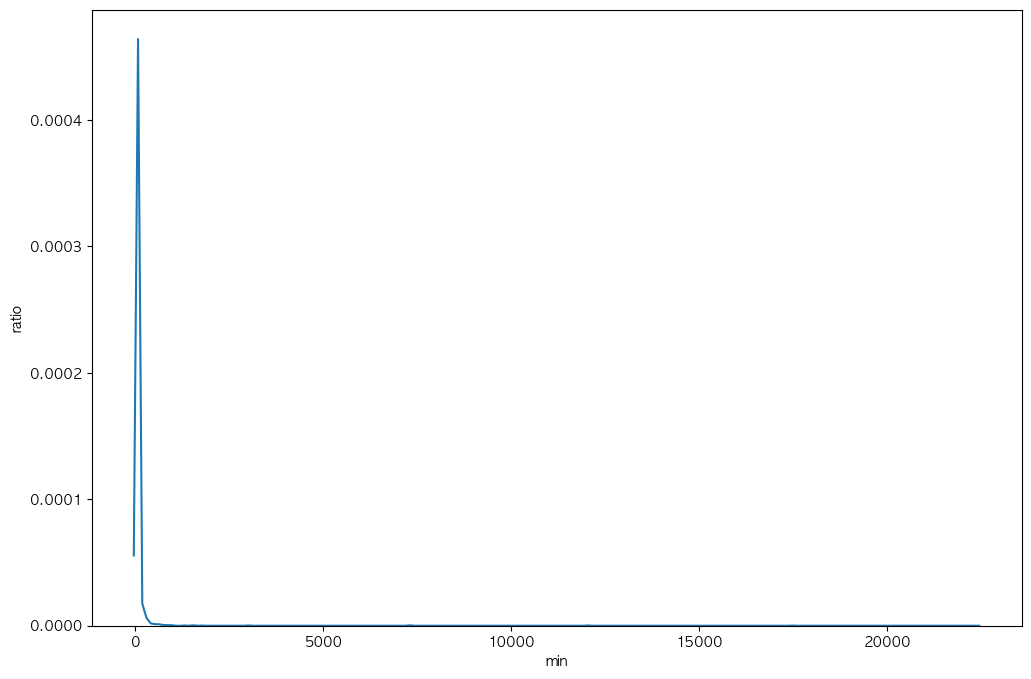

In [47]:
kde = sns.kdeplot(df['trip_duration_min'])
kde.set_xlabel('min')
kde.set_ylabel('ratio')
plt.show()

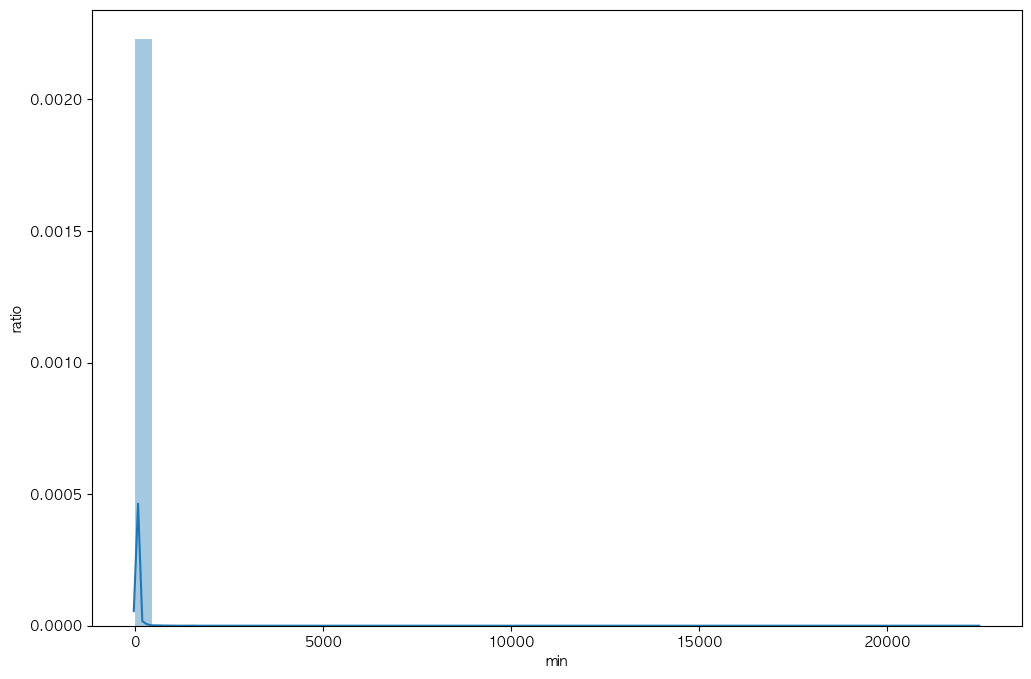

In [49]:
dist = sns.distplot(df['trip_duration_min'])
dist.set_xlabel('min')
dist.set_ylabel('ratio')
plt.show()

In [54]:
print(f"왜도 : {df['trip_duration_min'].skew()}") 
#116 , 오른쪽으로 굉장히 치우친 분포. 데이터가 낮은 값에 몰려있고, 높은 값들이 존재함

print(f"첨도 : {df['trip_duration_min'].kurt()}")
# 15913 , 굉장히 뾰족한 형태의 분포를 나타냄을 알 수 있음. 극단값이 존재하는 것을 확인할 수 있음. (이상치)

왜도 : 116.00262442002963
첨도 : 15913.196644227899


- 왜도 (skewness) : 0에 가까울 수록 분포가 좌우 대칭이다.
- 음수 : 왼쪽으로 치우친 분포, 양수 : 오른쪽으로 치우친 분포

- 첨도 (kurtosis) : 분포의 꼬리 부분이 얼마나 두꺼운지 나타낸다. 3에 가까울 수록 정규분포를 따름
- 3보다 작은 첨도 : 평범한 분포, 3보다 큰 첨도 : 뾰족한 분포

### 이상치 제거
y 값에 굉장히 큰 값이 존재하여 해당 이상치를 제거하고 EDA를 진행

In [62]:
df_sorted = df.sort_values(by='trip_duration_min',ascending=False) #내림차순
df_sorted['trip_duration_min'].head()

21308    22407.700000
45344    17456.483333
55401    12067.333333
28983    11334.700000
67912     7299.900000
Name: trip_duration_min, dtype: float64

In [64]:
# y값 기준으로 최상위 1%의 값을 제거하고 진행
cut_point  = df['trip_duration_min'].quantile(0.99) # 상위1%값을 cut_point 에 지정
df_cut = df[df['trip_duration_min']<cut_point] 

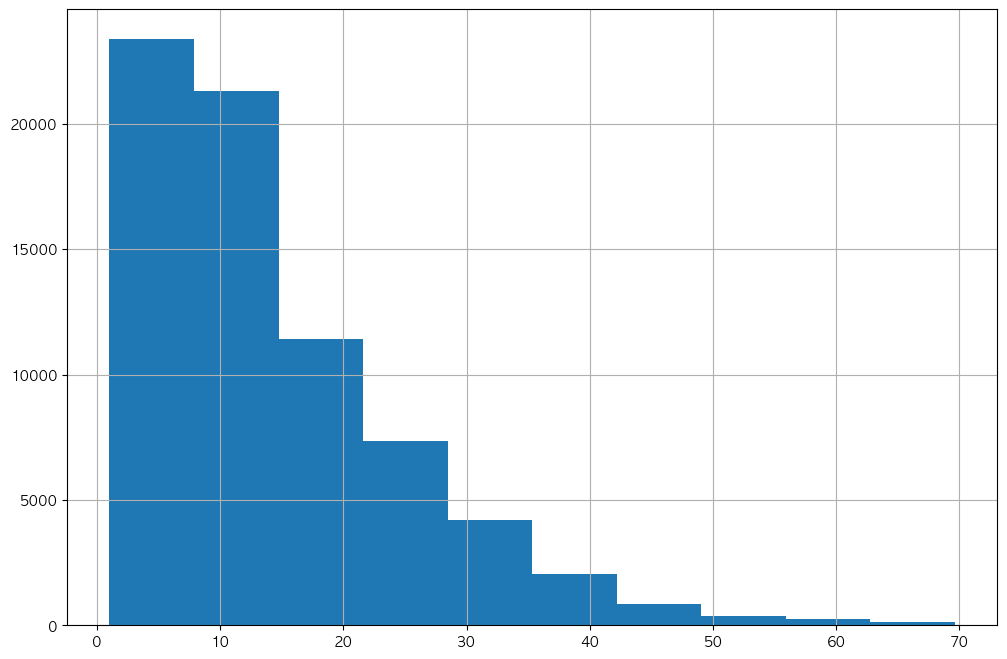

In [66]:
df_cut['trip_duration_min'].hist()
plt.show()

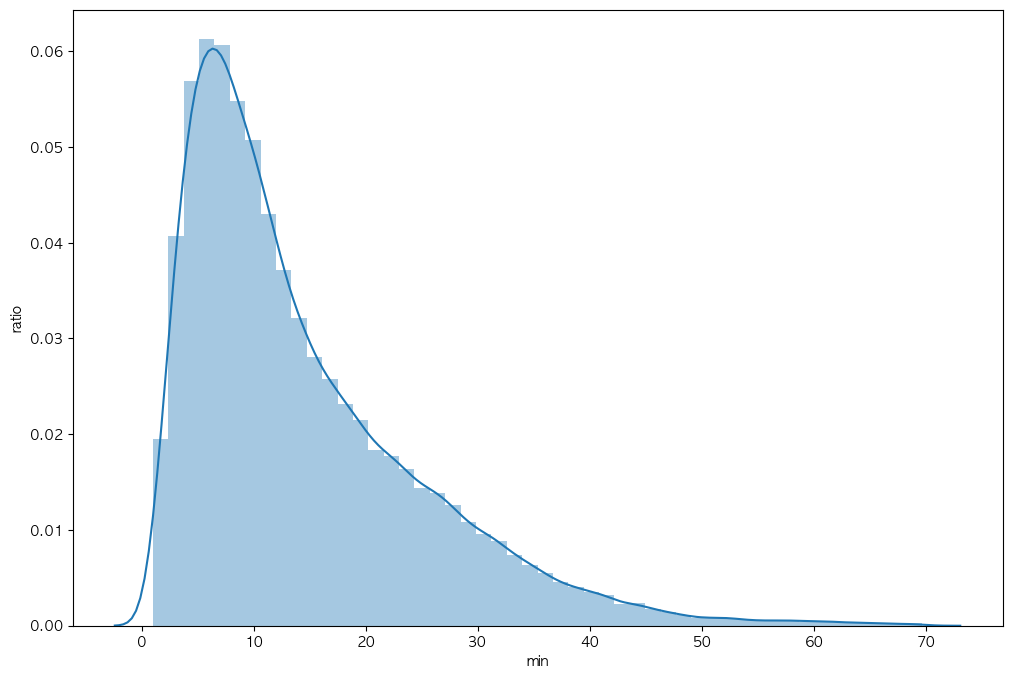

In [68]:
dist= sns.distplot(df_cut['trip_duration_min'])
dist.set_xlabel('min')
dist.set_ylabel('ratio')
plt.show()

In [70]:
print(f'왜도 : {df_cut['trip_duration_min'].skew()}')
print(f'척도 : {df_cut['trip_duration_min'].kurt()}')

왜도 : 1.4180106243305644
척도 : 2.3079835822424806


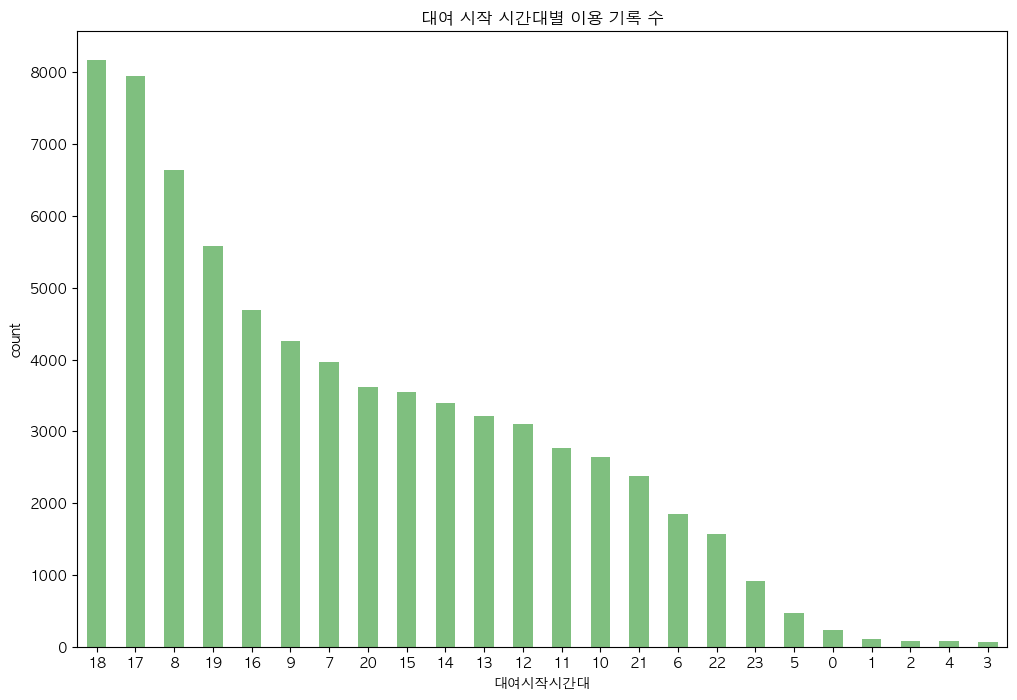

In [88]:
# 대여 시작 시간대별 이용 기록수 (bar)
df_cut['start_hour'].value_counts().plot(kind='bar',color='green',alpha=0.5)
plt.xlabel('대여시작시간대')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.title('대여 시작 시간대별 이용 기록 수')
plt.show()

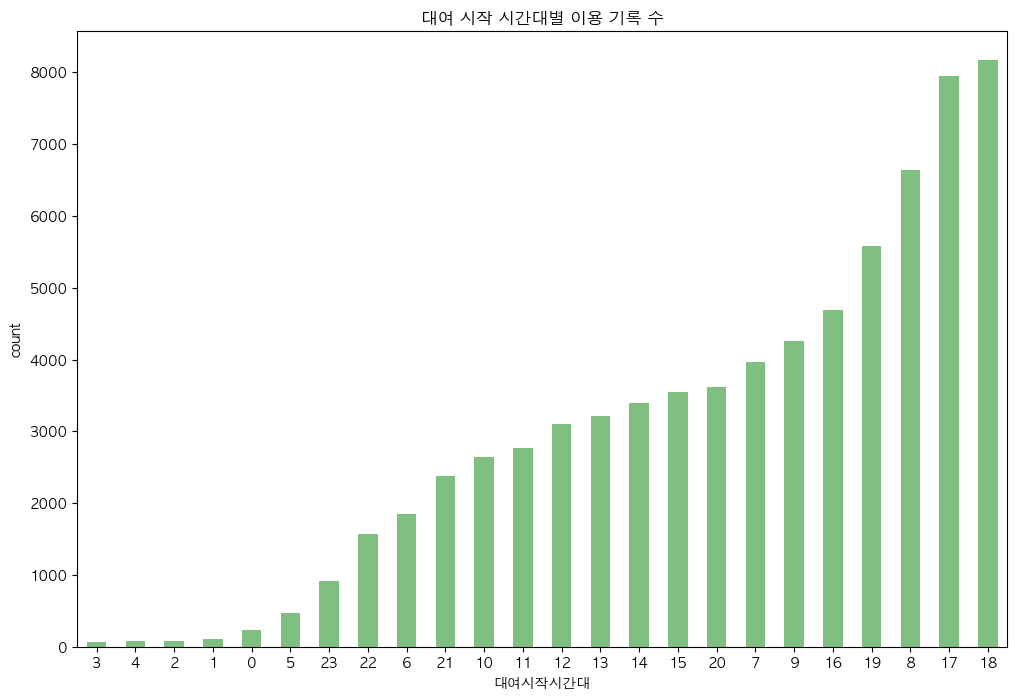

In [94]:
# 대여 시작 시간대별 이용 기록수 (bar)
df_cut['start_hour'].value_counts(ascending=True).plot(kind='bar',color='green',alpha=0.5,)
plt.xlabel('대여시작시간대')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.title('대여 시작 시간대별 이용 기록 수')
plt.show()

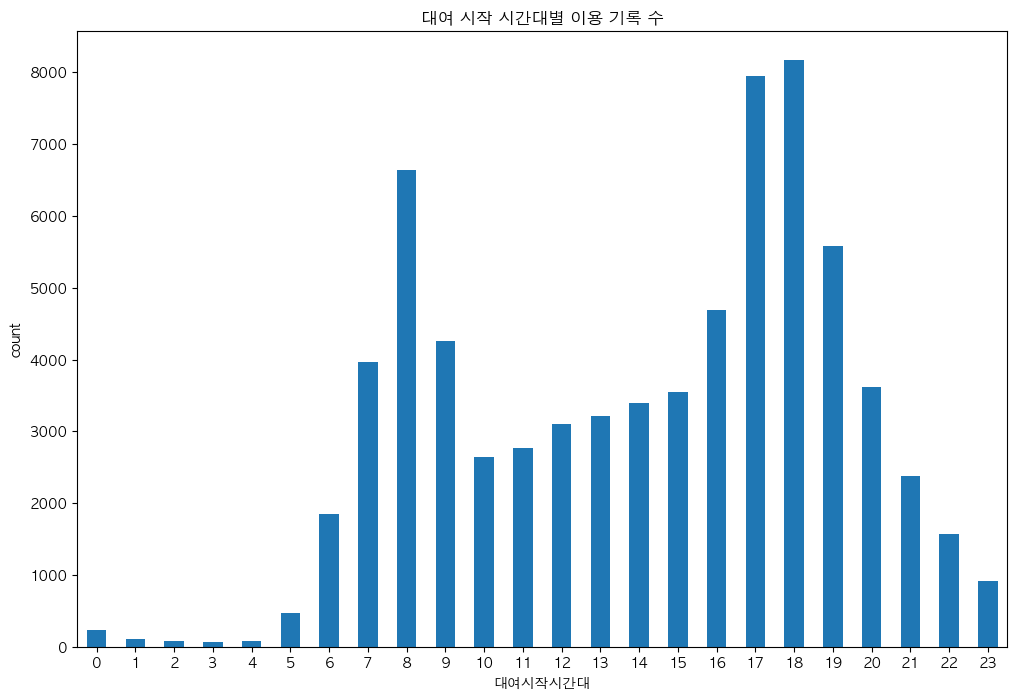

In [96]:
df_cut['start_hour'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.xlabel('대여시작시간대')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.title('대여 시작 시간대별 이용 기록 수')
plt.show()

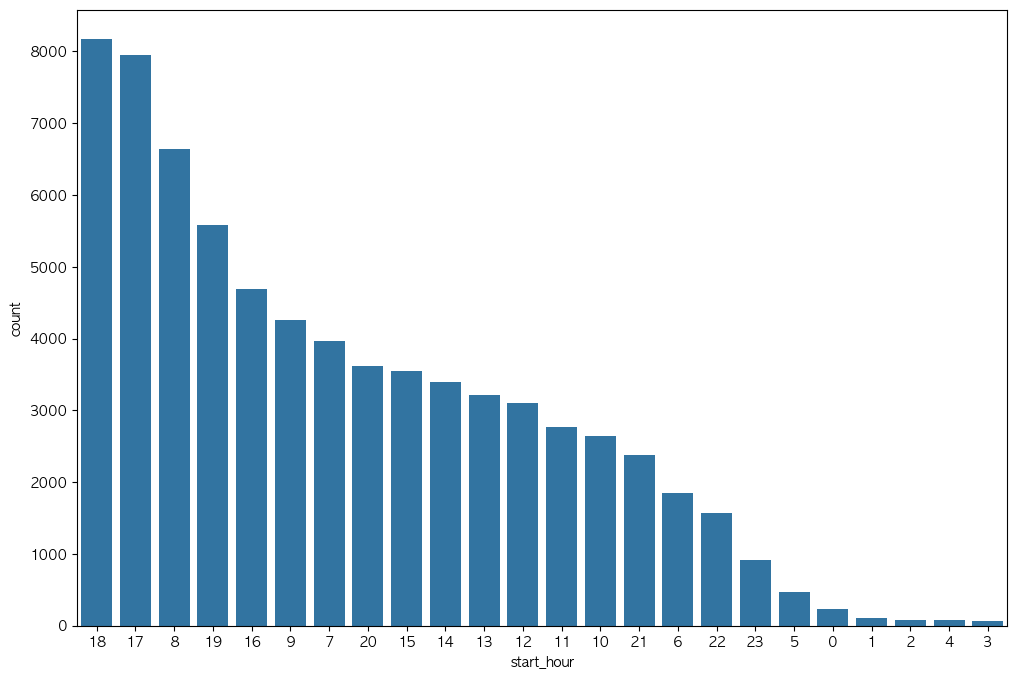

In [98]:
vc = df_cut['start_hour'].value_counts()

sns.barplot(x=vc.index, y=vc, order=vc.index)
plt.show()

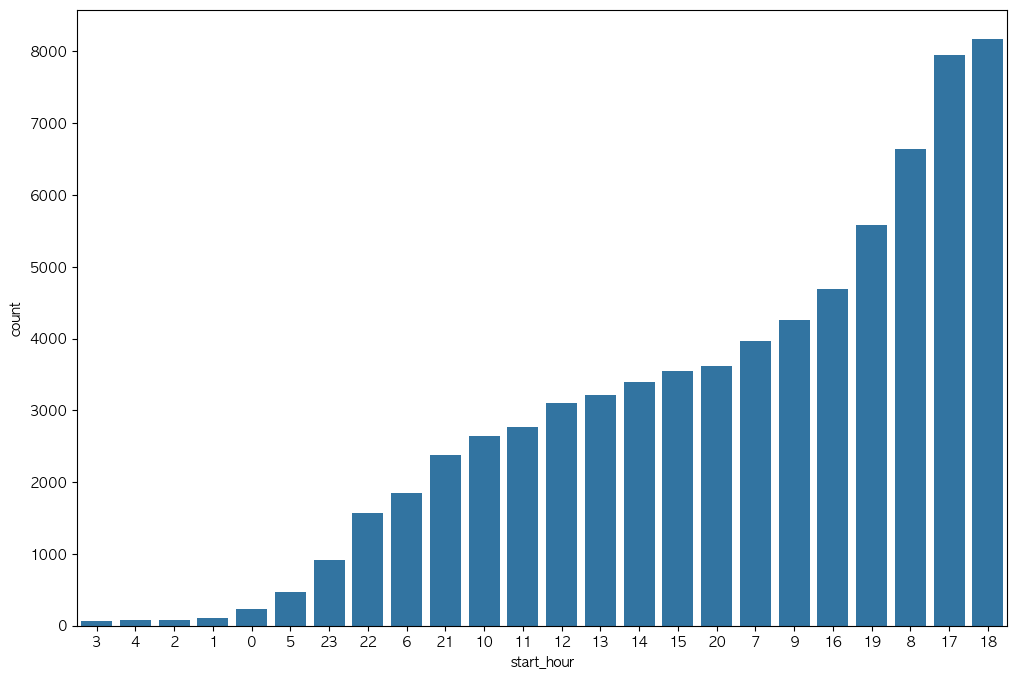

In [100]:
vc = df_cut['start_hour'].value_counts(ascending=True)

sns.barplot(x=vc.index, y=vc, order=vc.index)
plt.show()

주로 출퇴근 시간에 사용자가 많은 것으로 보이며, 이동이 적은 새벽 시간대에는 이용자 매우 적음 확인

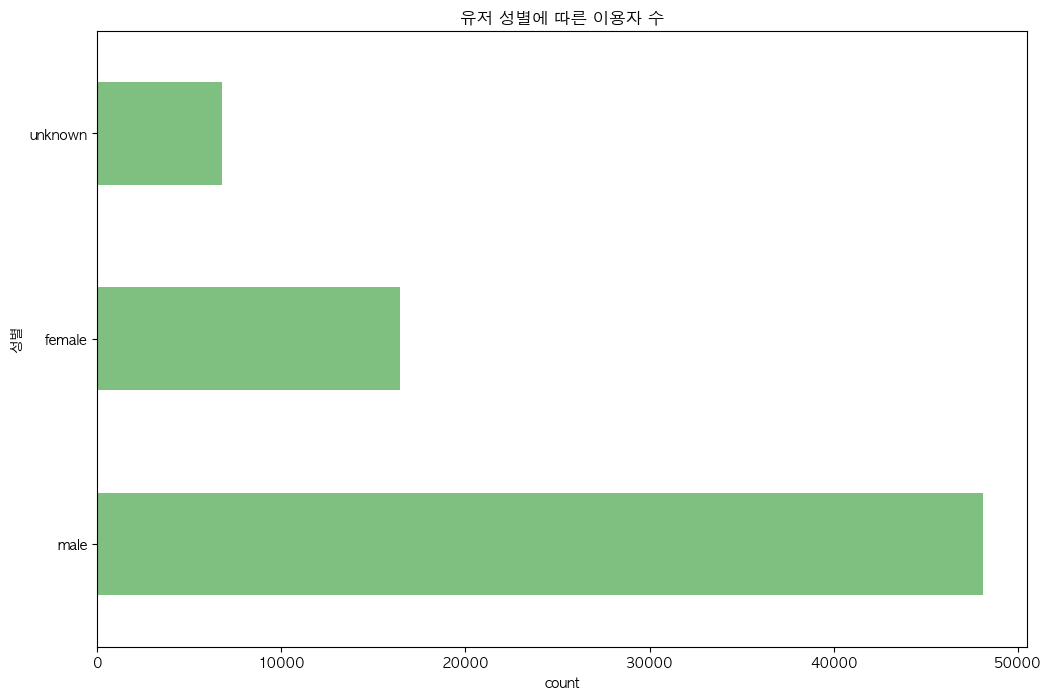

In [105]:
# 성별의 빈도
df_cut['gender'].value_counts().plot(kind='barh',color='green',alpha=0.5)
plt.xlabel('count')
plt.ylabel('성별')
plt.title('유저 성별에 따른 이용자 수')
plt.show()

남성 유저가 여성 유저보다 많음

In [108]:
# 시작 지점별 빈도
df_cut['start_station_name'].value_counts().nlargest(10) #상위10개

start_station_name
Pershing Square North    749
West St & Chambers St    504
Broadway & E 22 St       501
W 21 St & 6 Ave          468
8 Ave & W 33 St          443
E 17 St & Broadway       442
E 47 St & Park Ave       441
W 41 St & 8 Ave          436
W 22 St & 10 Ave         431
W 38 St & 8 Ave          407
Name: count, dtype: int64

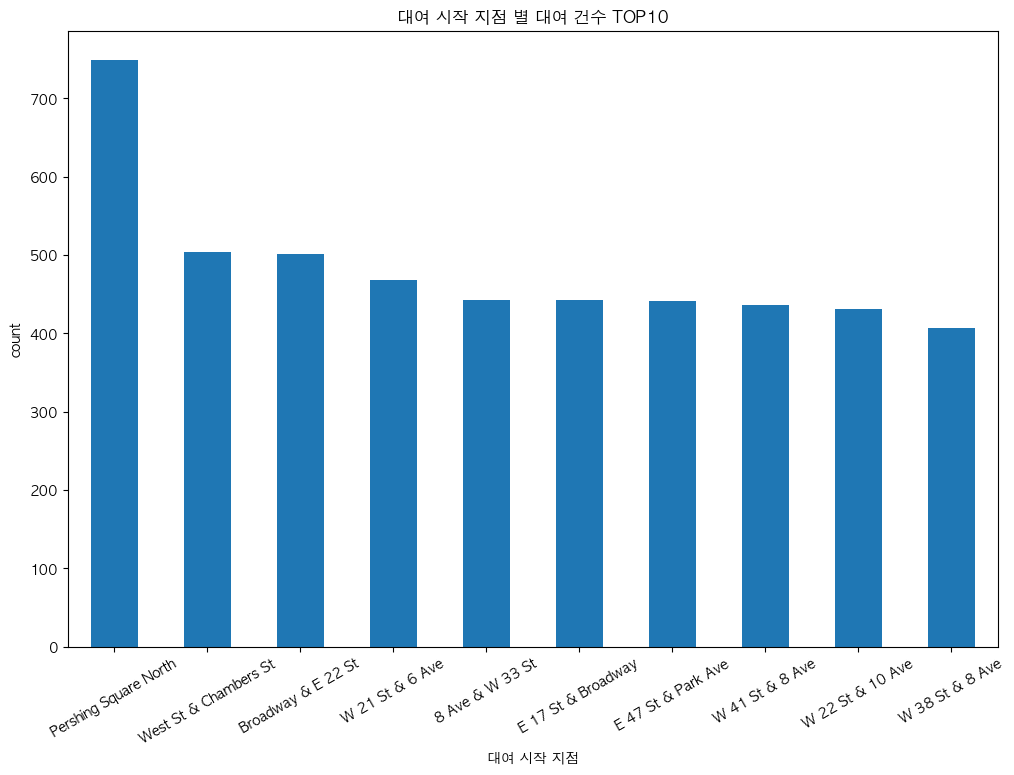

In [122]:
df_cut['start_station_name'].value_counts().nlargest(10).plot(kind='bar')
plt.xticks(rotation=30)
plt.ylabel('count')
plt.xlabel('대여 시작 지점')
plt.title('대여 시작 지점 별 대여 건수 TOP10')
plt.show()

### 두 변수간의 관계를 파악 & 분석

- 연속형, 연속형 : scatter plot > 상관관계 분석
- 범주형, 범주형 : 누적 막대그래프 > 카이제곱 분석 ( 두 변수가 독립적인지 )
- 범주형, 연속형 : 누적 막대그래프, 범주별 히스토그램 > 범주 2개 : t test, z test, 범주3개이상: anova(분산분석)

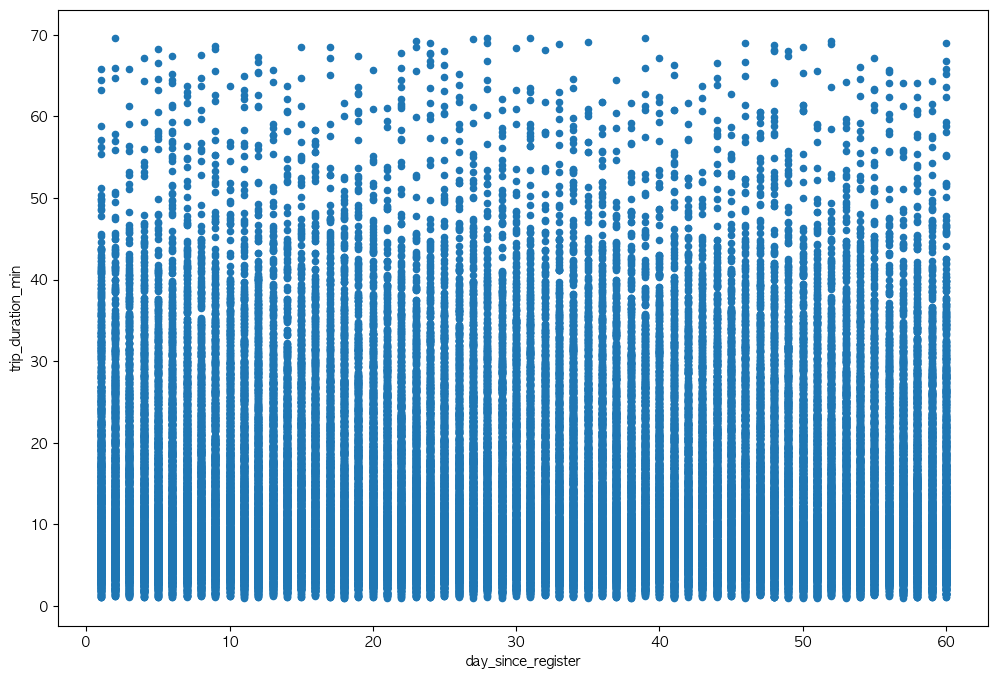

In [127]:
# 연속형 & 연속형 : 신규 가입자일수록 주행 시간이 더 짧지 않을까
df_cut.plot.scatter(x='day_since_register', y='trip_duration_min')
plt.show()

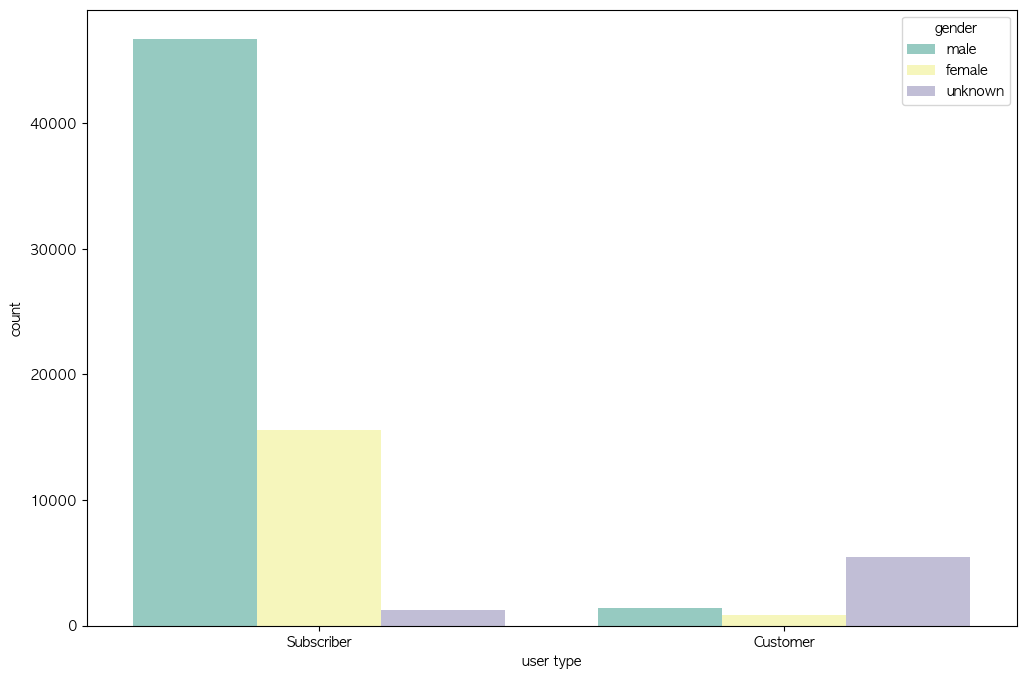

In [137]:
# 범주형 & 범주형 : user type 과 gender 간의 관계 ( Unknown 해당하는 사람들은 일회사용자일 가능성 높음 )
user_gender = sns.countplot(x='usertype',hue='gender', data=df_cut, palette='Set3')
user_gender.set_xlabel('user type')
user_gender.set_ylabel('count')
plt.show()

In [181]:
# 대여 시작 지점, user type (TOP 10)
top_list = df_cut['start_station_name'].value_counts().nlargest(10).index
df_top = df_cut[df_cut['start_station_name'].isin(top_list)]
df_top.head()

,start_date,end_date,start_hour,end_hour,trip_duration,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,usertype,birth_year,gender,day_since_register,trip_duration_min
6,2018-05-01,2018-05-01,3,4,2102,490,8 Ave & W 33 St,40.751551,-73.993934,387,Centre St & Chambers St,40.712733,-74.004607,33314,Customer,1970,male,41,35.033333
33,2018-05-01,2018-05-01,1,2,1856,523,W 38 St & 8 Ave,40.754666,-73.991382,499,Broadway & W 60 St,40.769155,-73.981918,17240,Customer,1983,male,30,30.933333
50,2018-05-01,2018-05-01,4,4,642,519,Pershing Square North,40.751873,-73.977706,3142,1 Ave & E 62 St,40.761227,-73.960940,32414,Subscriber,1989,male,24,10.700000
103,2018-05-01,2018-05-01,2,2,845,519,Pershing Square North,40.751873,-73.977706,504,1 Ave & E 16 St,40.732219,-73.981656,25781,Subscriber,1992,male,11,14.083333
114,2018-05-01,2018-05-01,3,3,327,477,W 41 St & 8 Ave,40.756405,-73.990026,508,W 46 St & 11 Ave,40.763414,-73.996674,15064,Subscriber,1980,male,20,5.450000


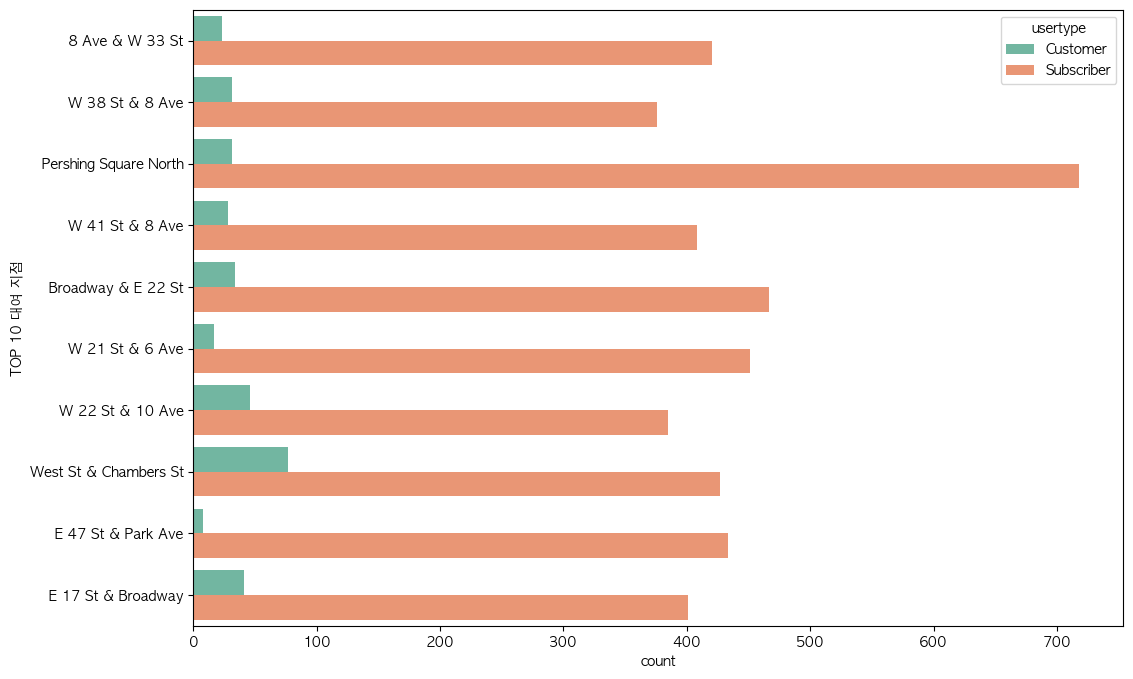

In [197]:
cnt = sns.countplot(y='start_station_name',hue='usertype',data= df_top,palette='Set2')
cnt.set_xlabel('count')
cnt.set_ylabel('TOP 10 대여 지점')
plt.show()

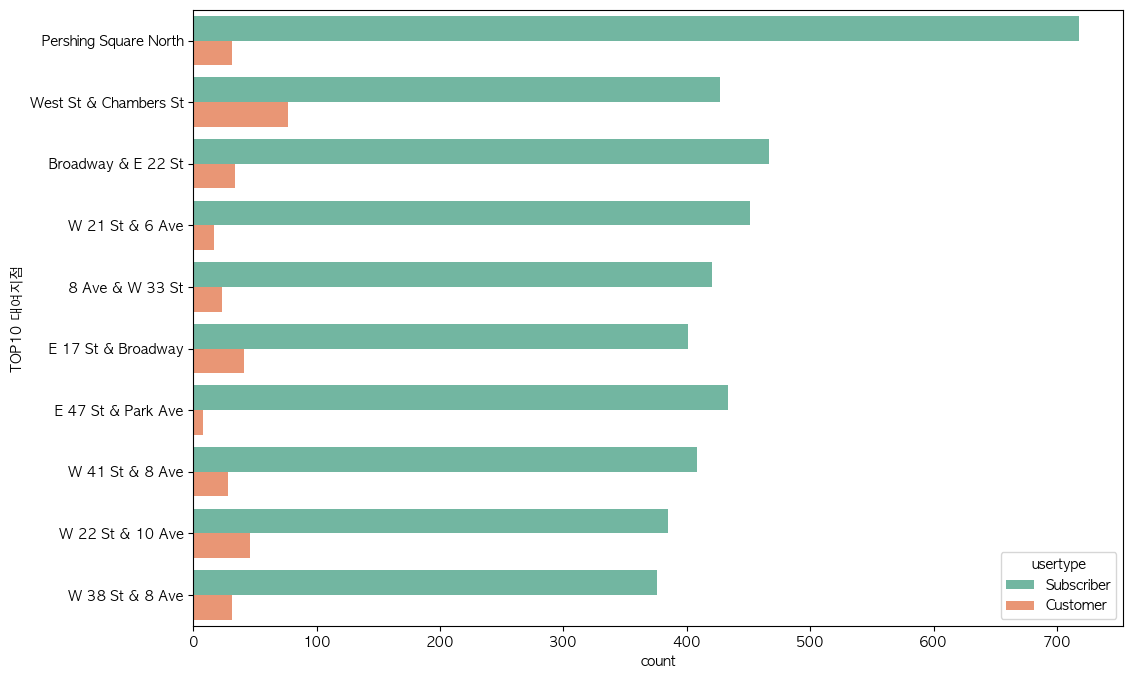

In [199]:
cnt= sns.countplot(y='start_station_name',hue='usertype', palette='Set2', data=df_cut, order = top_list)

cnt.set_xlabel('count')
cnt.set_ylabel('TOP10 대여지점')
plt.show()

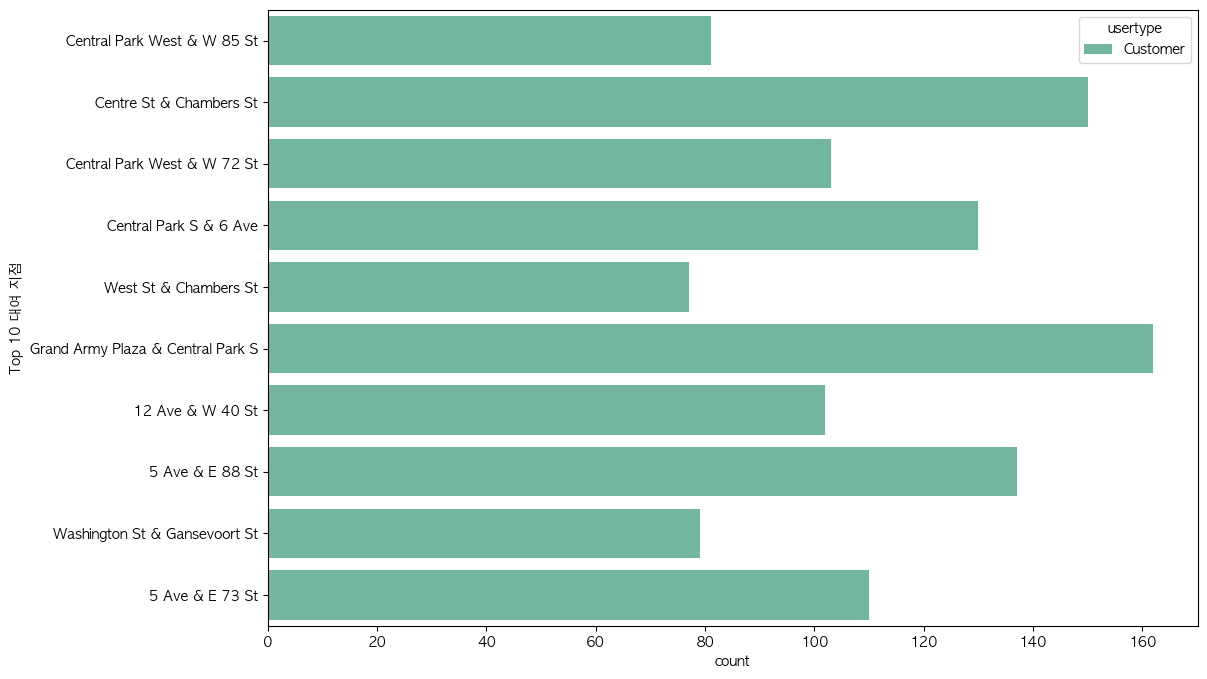

In [201]:
df_customer = df_cut[df_cut['usertype']=='Customer']
top_list_customer = df_customer['start_station_name'].value_counts().nlargest(10).index

df_top_customer = df_customer[df_customer['start_station_name'].isin(top_list_customer)]

cnt = sns.countplot(y='start_station_name',hue='usertype',palette= 'Set2',data=df_top_customer)

cnt.set_xlabel('count')
cnt.set_ylabel('Top 10 대여 지점')
plt.show()

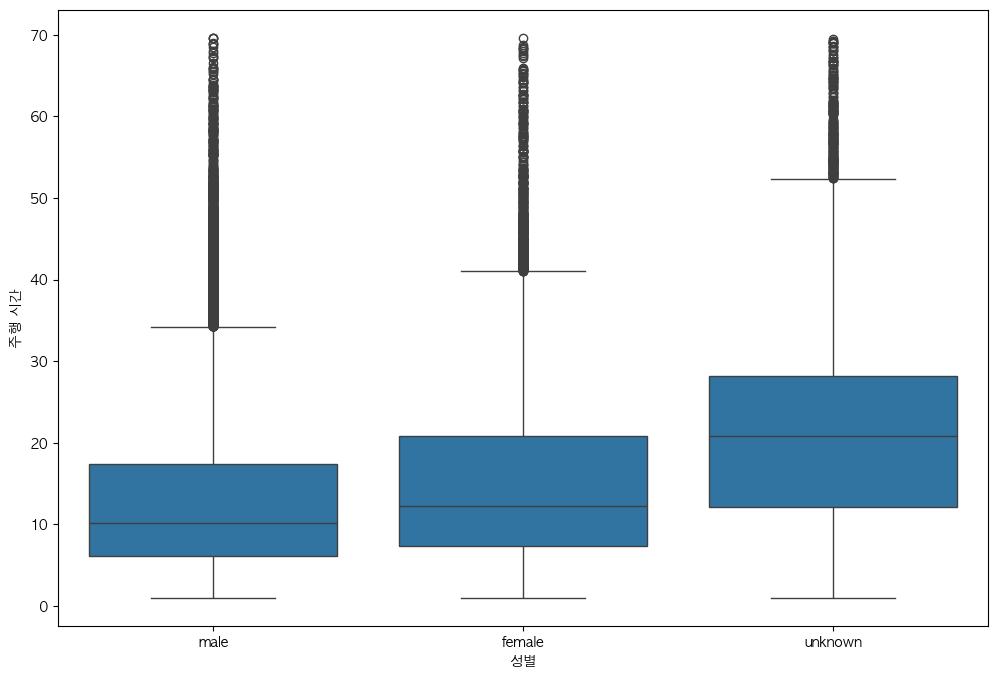

In [209]:
# 범주형 & 연속형  : 성별과 주행시간 (boxplot)

box = sns.boxplot(x='gender',y='trip_duration_min',data=df_cut)
box.set_xlabel('성별')
box.set_ylabel('주행 시간')
plt.show()

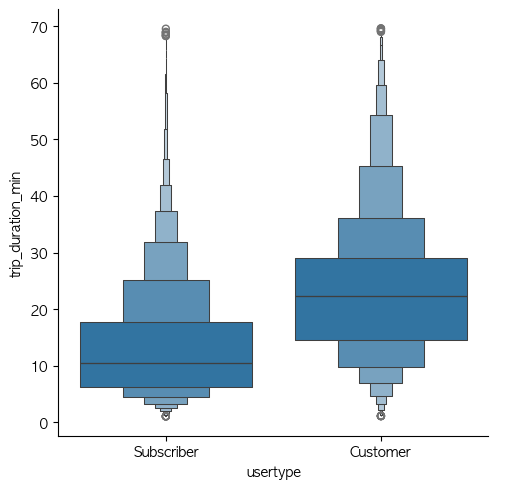

In [211]:
# 유저 타입과 주행시간 
sns.catplot(x='usertype',y='trip_duration_min',data=df_cut, kind='boxen')
plt.show()

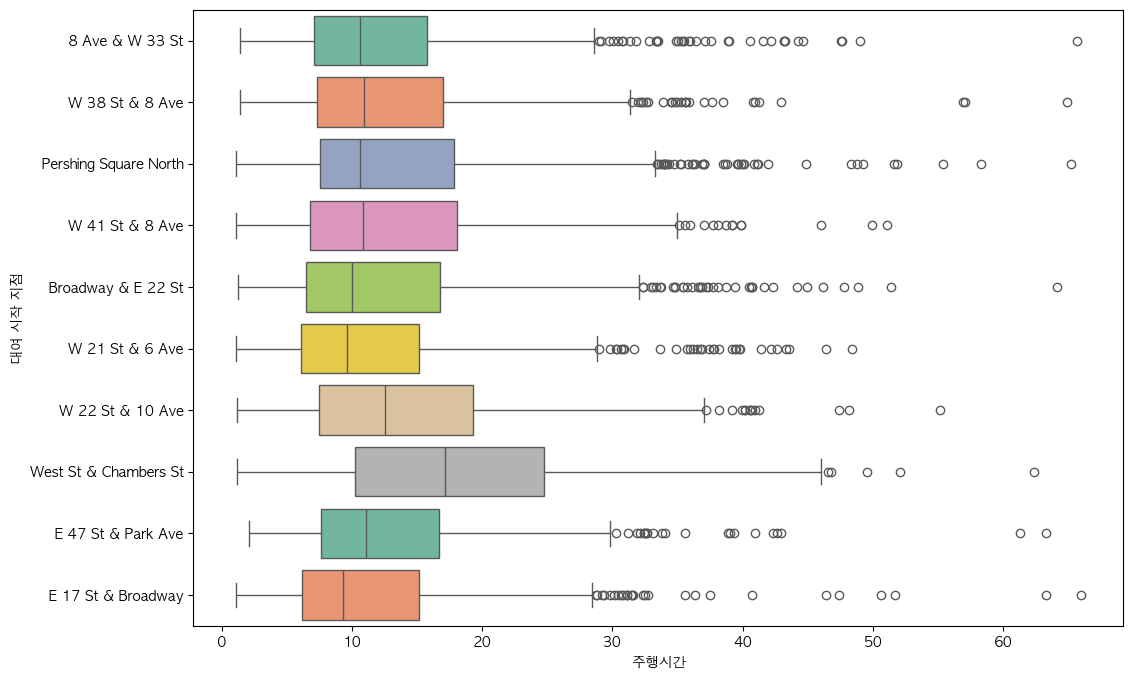

In [217]:
# 대여시작 지점 top10, 주행시간 (boxplot)

box = sns.boxplot(y='start_station_name',x ='trip_duration_min',data= df_top,palette='Set2')
box.set_xlabel('주행시간')
box.set_ylabel('대여 시작 지점')
plt.show()

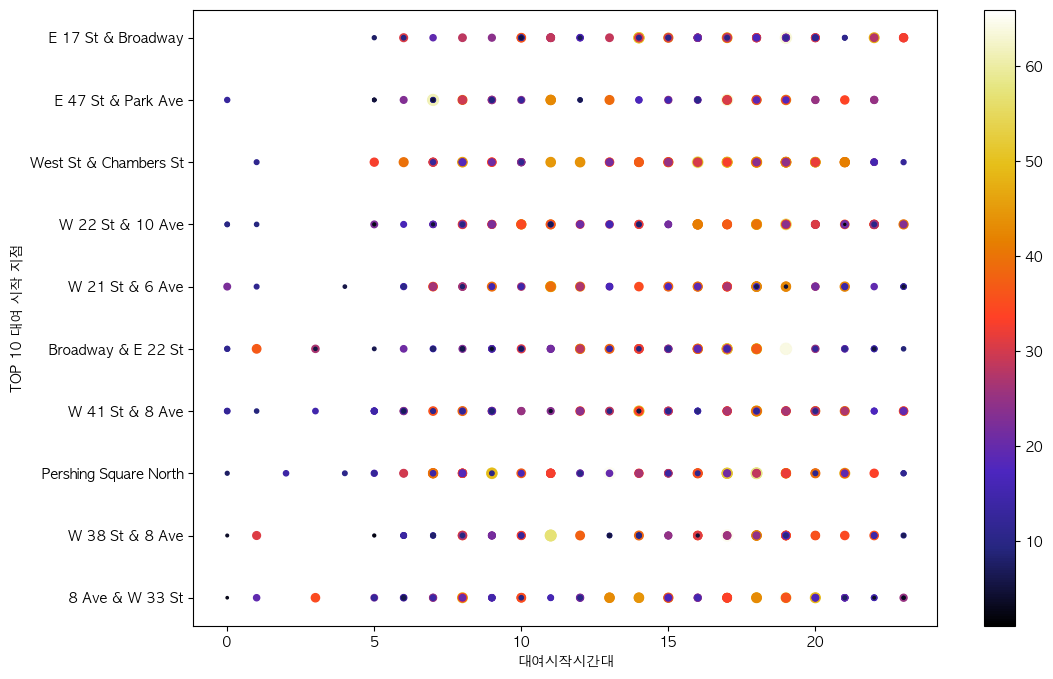

In [227]:
# 3개 이상의 변수 ( top 10 지역, 대여 시작 시간, 대여 시간)
# scatter plot : x, y ,크기, 색상
plt.scatter(df_top['start_hour'], # x축 시작 시간
            df_top['start_station_name'], #y축 top 10 지역
            c=df_top['trip_duration_min'], # 색상 대여 시간
            s = df_top['trip_duration_min'], # 크기 대여 시간
            cmap = 'CMRmap')
plt.colorbar()
plt.xlabel('대여시작시간대')
plt.ylabel('TOP 10 대여 시작 지점')
plt.show()
            

In [241]:
# TOP 10 지역, 대여 시작 시간을 기준으로 bike id가 빌려진 횟수

base = df_top.groupby(['start_station_name','start_hour'])['bike_id'].count().unstack() #데이터프레임화
base.head()

start_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
start_station_name,,,,,,,,,,,,,,,,,,,,,
8 Ave & W 33 St,1.0,1.0,NaN,1.0,NaN,12.0,23.0,21.0,45.0,34.0,...,9.0,19.0,23.0,53.0,53.0,48.0,17.0,21.0,15.0,5.0
Broadway & E 22 St,5.0,1.0,NaN,2.0,NaN,1.0,5.0,9.0,32.0,16.0,...,26.0,20.0,30.0,74.0,133.0,67.0,15.0,8.0,6.0,1.0
E 17 St & Broadway,NaN,NaN,NaN,NaN,NaN,2.0,7.0,11.0,17.0,26.0,...,30.0,21.0,36.0,56.0,54.0,41.0,28.0,7.0,16.0,9.0
E 47 St & Park Ave,1.0,NaN,NaN,NaN,NaN,5.0,11.0,36.0,34.0,14.0,...,6.0,12.0,34.0,116.0,97.0,30.0,8.0,1.0,2.0,NaN
Pershing Square North,1.0,NaN,1.0,NaN,1.0,6.0,9.0,57.0,99.0,72.0,...,17.0,27.0,39.0,100.0,128.0,62.0,20.0,18.0,9.0,3.0


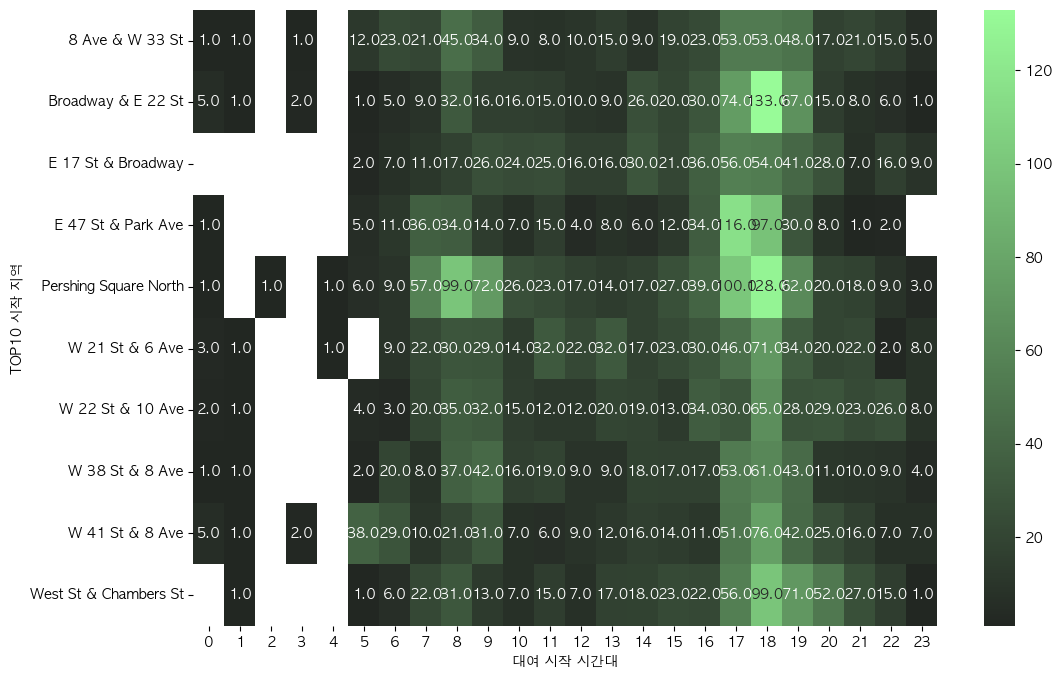

In [243]:
pal = sns.dark_palette('palegreen',as_cmap=True)

sns.heatmap(base,annot=True, fmt='.1f',cmap=pal)
plt.xlabel('대여 시작 시간대')
plt.ylabel('TOP10 시작 지역')
plt.show()

확실히 출근 시간대에 빌리는 사람많음  
( as_cmap : 해당 팔레트를 cmap으로 변환할지?)

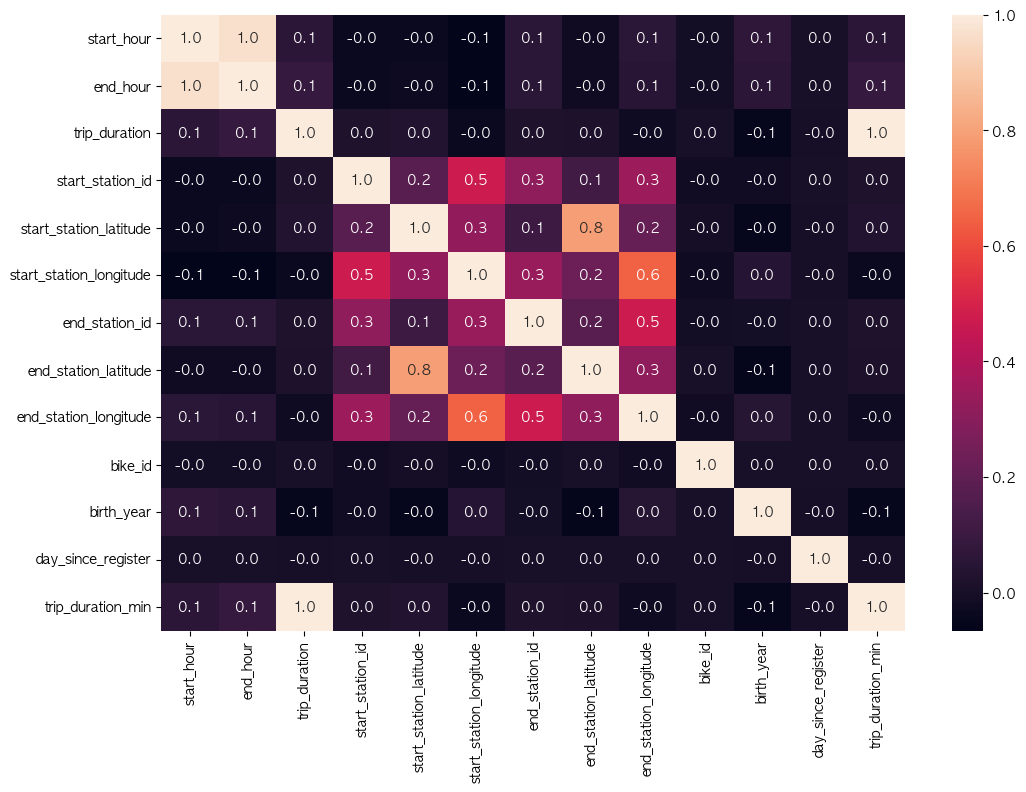

In [247]:
df_corr = df_cut.select_dtypes(include=[np.number])
sns.heatmap(df_corr.corr(), annot = True, fmt='.1f')
plt.show()

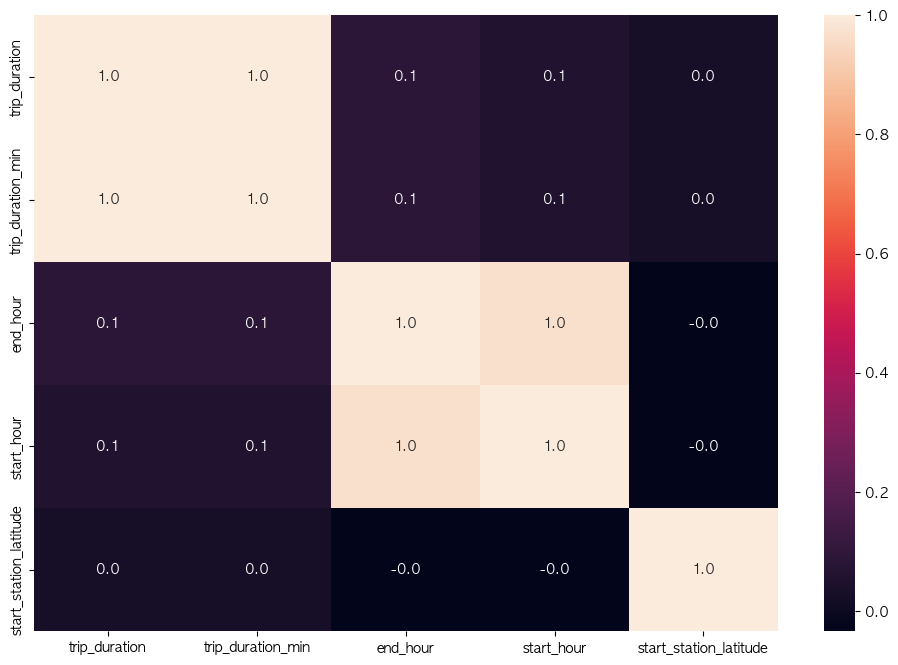

In [257]:
def draw_corrmat_top(df,y,k):
    y_corr = df.corr()
    y_cols = y_corr.nlargest(5,'trip_duration_min')['trip_duration_min'].index
    cm = np.corrcoef(df[y_cols].values.T) #상관행렬
    sns.heatmap(cm,annot=True, fmt='.1f', xticklabels=y_cols.values, yticklabels=y_cols.values)
    plt.show()

draw_corrmat_top(df_corr, 'trip_duration_min', 5)

In [268]:
# bike_id 기준으로 데이터 분석 
#바이크의 누적 시간을 계산해서 감가상각을 계산할 수 있다.
#사용량 과도한 바이크와 낮은 바이크의 존재를 확인할 수 있다.
# 각 bike_id 별로  trip_duration 의 합을 데이터프레임으로 나타내보자. (df)
bike_id = df.groupby('bike_id')['trip_duration'].sum().to_frame()
bike_id.head()

,trip_duration
bike_id,
14529,4263
14530,6963
14532,6636
14533,7368
14534,3576


In [272]:
bike_id['trip_duration_min'] = bike_id['trip_duration']/60
bike_id['trip_duration_hour'] = bike_id['trip_duration_min']/60
bike_id.describe().round()

,trip_duration,trip_duration_min,trip_duration_hour
count,10147.0,10147.0,10147.0
mean,7431.0,124.0,2.0
std,22090.0,368.0,6.0
min,71.0,1.0,0.0
25%,2891.0,48.0,1.0
50%,5595.0,93.0,2.0
75%,9275.0,155.0,3.0
max,1362517.0,22709.0,378.0


In [274]:
# 바이크 사용량 하위 0.1%의 bike_id

cut_point= bike_id['trip_duration'].quantile(0.001)
bike_low = bike_id[bike_id['trip_duration']<cut_point]
bike_low.head()

,trip_duration,trip_duration_min,trip_duration_hour
bike_id,,,
16414,72,1.200000,0.020000
17716,81,1.350000,0.022500
17816,89,1.483333,0.024722
18107,88,1.466667,0.024444
19460,96,1.600000,0.026667


In [276]:
# 바이크 사용량 상위 0.1%의 bike_id
cut_point = bike_id['trip_duration'].quantile(0.999)
bike_high = bike_id[bike_id['trip_duration'] > cut_point]
bike_high

,trip_duration,trip_duration_min,trip_duration_hour
bike_id,,,
17354,145354,2422.566667,40.376111
19841,685774,11429.566667,190.492778
21514,145235,2420.583333,40.343056
24983,445775,7429.583333,123.826389
26404,179971,2999.516667,49.991944
26909,434861,7247.683333,120.794722
27371,347749,5795.816667,96.596944
28543,1048853,17480.883333,291.348056
30298,725557,12092.616667,201.543611


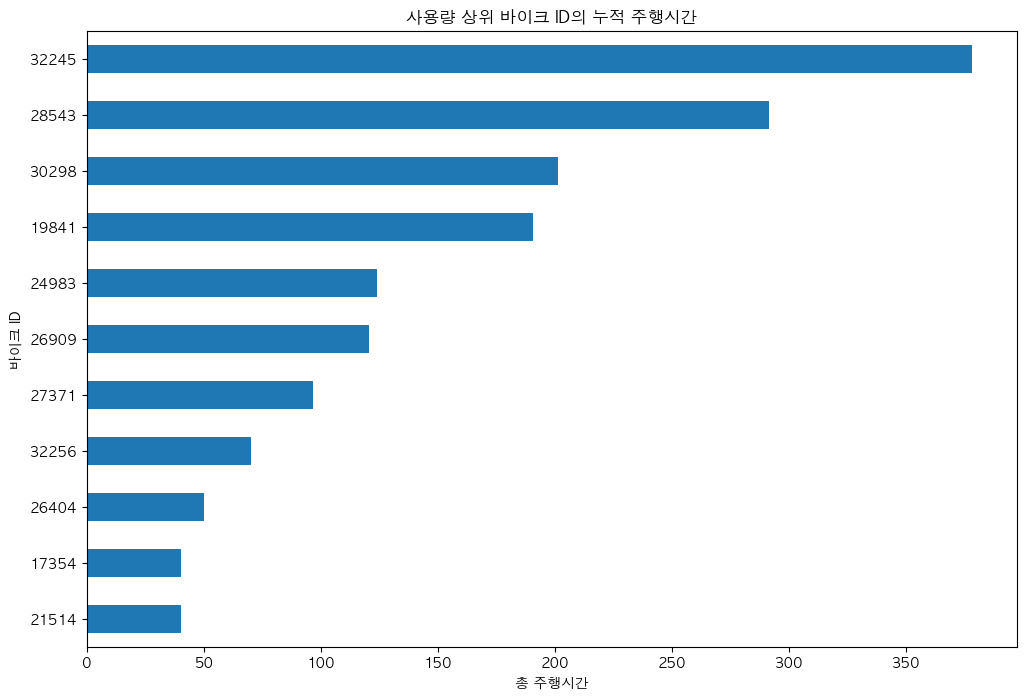

In [278]:
bike_high['trip_duration_hour'].sort_values().plot(kind='barh')

plt.xlabel('총 주행시간')
plt.ylabel('바이크 ID')
plt.title('사용량 상위 바이크 ID의 누적 주행시간')
plt.show()

In [280]:
# 바이크 사용량 하위 0.1%의 bike_id
cut_point = bike_id['trip_duration'].quantile(0.001)
bike_low = bike_id[bike_id['trip_duration'] < cut_point]
bike_low.head(1)

,trip_duration,trip_duration_min,trip_duration_hour
bike_id,,,
16414,72,1.2,0.02


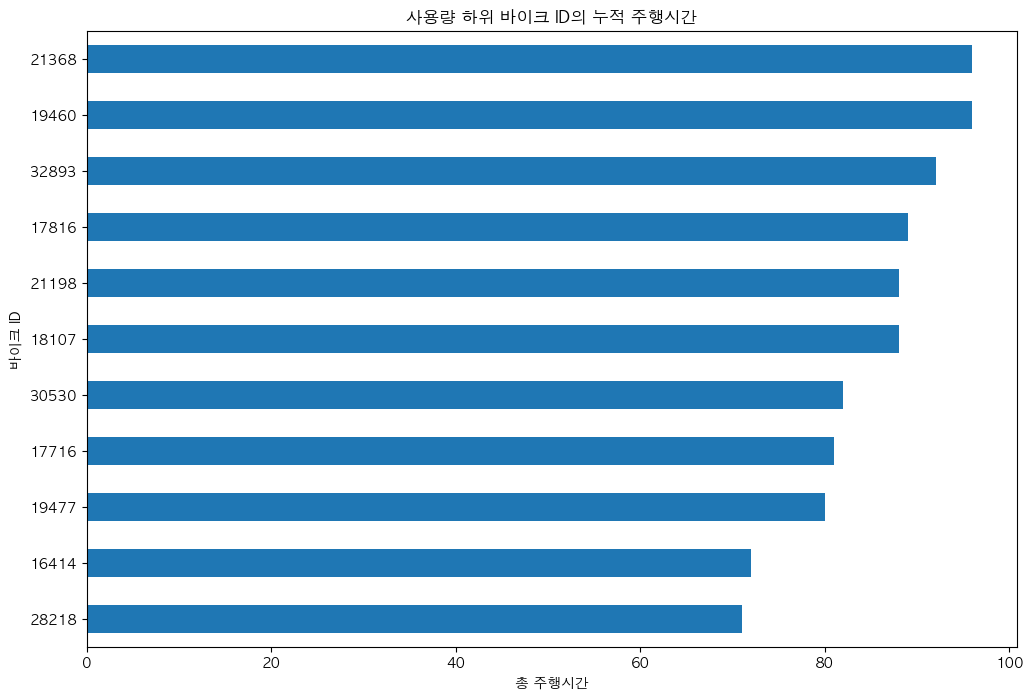

In [282]:
bike_low['trip_duration'].sort_values().plot(kind='barh')

plt.xlabel('총 주행시간')
plt.ylabel('바이크 ID')
plt.title('사용량 하위 바이크 ID의 누적 주행시간')
plt.show()

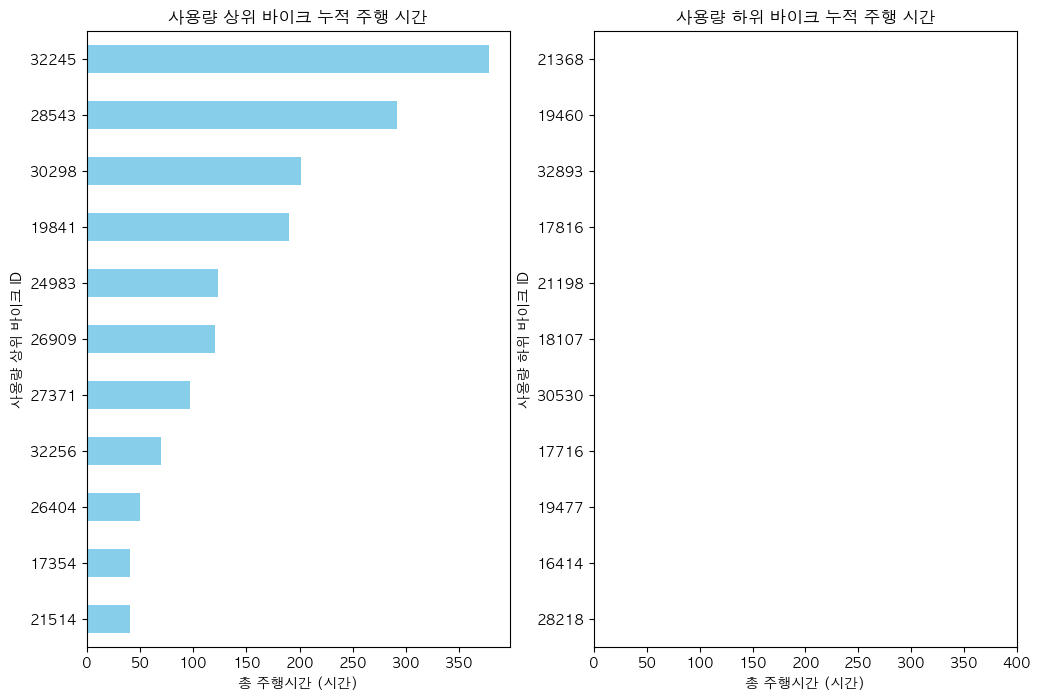

In [286]:
plt.subplot(121)
bike_high['trip_duration_hour'].sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('총 주행시간 (시간)')
plt.ylabel('사용량 상위 바이크 ID')
plt.title('사용량 상위 바이크 누적 주행 시간')

plt.subplot(122)
bike_low['trip_duration_hour'].sort_values().plot(kind='barh', color='salmon')
plt.xlabel('총 주행시간 (시간)')
plt.ylabel('사용량 하위 바이크 ID')
plt.title('사용량 하위 바이크 누적 주행 시간')
plt.xlim(0, 400)

plt.show()

In [ ]:
# 상위 바이크의 start_station_name
start_locations = df[df['bike_id'].isin(bike_high.index)]['start_station_name']

start_locations.value_counts().plot(kind='barh')
plt.xlabel('count')
plt.ylabel('출발지역')
plt.show()

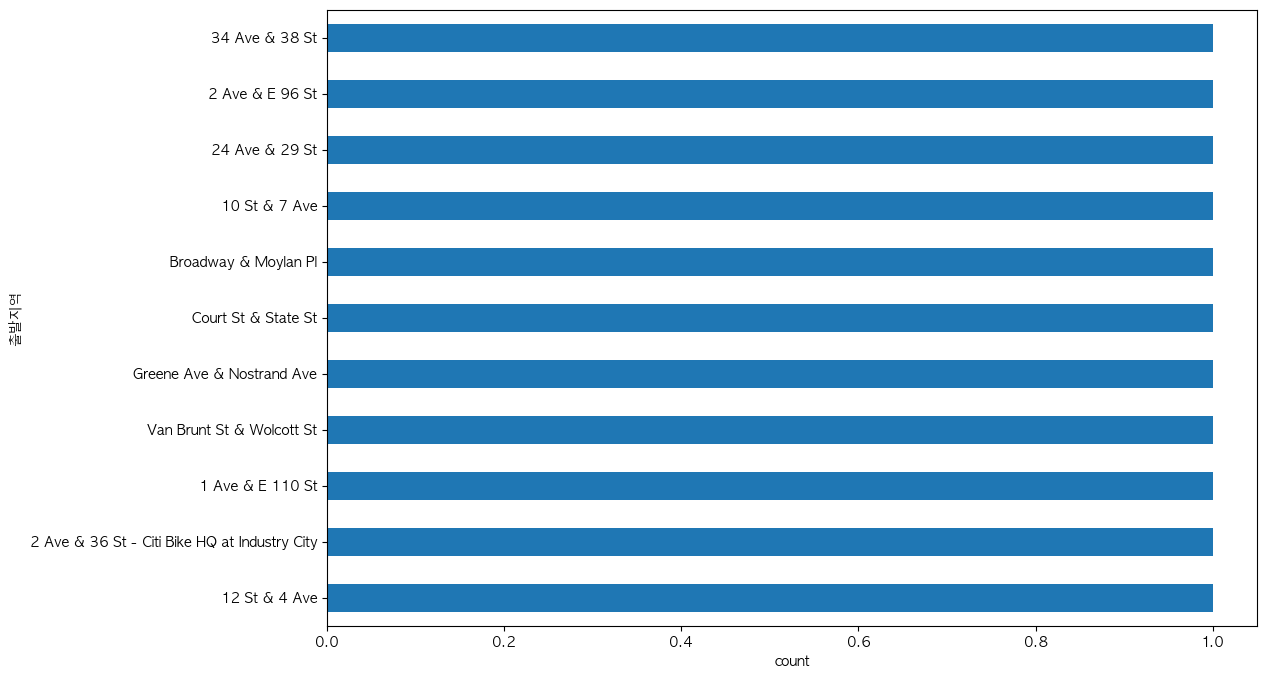

In [290]:
# 하위 바이크의 start_station_name
start_locations = df[df['bike_id'].isin(bike_low.index)]['start_station_name']

start_locations.value_counts().plot(kind='barh')
plt.xlabel('count')
plt.ylabel('출발지역')
plt.show()

상위 바이크와 하위 바이크의 총 누적 주행시간의 차이가 심하다.  
상위 바이크와 하위 바이크 모두 특정 지역에 집중되어 있지는 않다.

In [296]:
# 연령대(10, 20, 30, 40대 등)와 어떤 변수가 관계를 가지고 있을지? 어떻게 활용할 수 있을지?
import datetime
now = datetime.datetime.now()
now.year

2025

In [300]:
df['age'] = 2018 - df['birth_year']
df['age'].describe()

count    72035.000000
mean        40.005053
std         11.868175
min         16.000000
25%         30.000000
50%         38.000000
75%         49.000000
max        133.000000
Name: age, dtype: float64

In [306]:
bins = [10,20,30,40,50,60,70,80,90]
bins_labels = [10, 20, 30, 40, 50, 60, 70, 80]

df['age_bin'] = pd.cut(df['age'], bins, labels=bins_labels)
df['age_bin']

0        70
1        10
2        60
3        50
4        50
         ..
72030    20
72031    20
72032    40
72033    40
72034    20
Name: age_bin, Length: 72035, dtype: category
Categories (8, int64): [10 < 20 < 30 < 40 < 50 < 60 < 70 < 80]

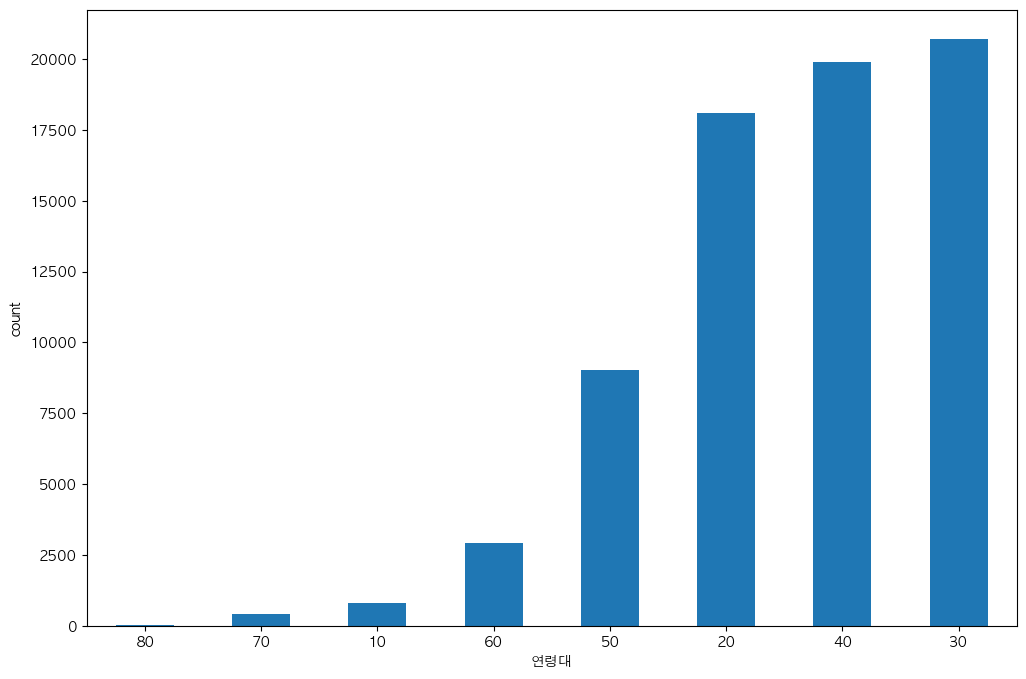

In [308]:
# 연령대별 인구 그래프
df['age_bin'].value_counts(ascending=True).plot(kind='bar')
plt.xlabel('연령대')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.show()

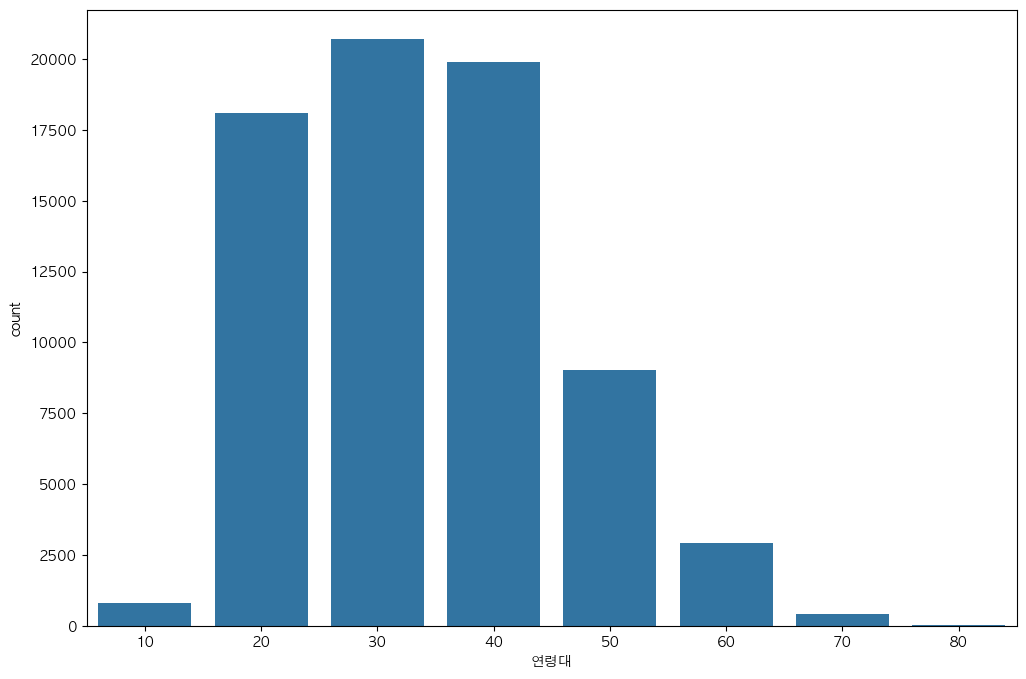

In [310]:
age = sns.countplot(x='age_bin', data=df)
age.set_xlabel('연령대')
age.set_ylabel('count')
plt.show()

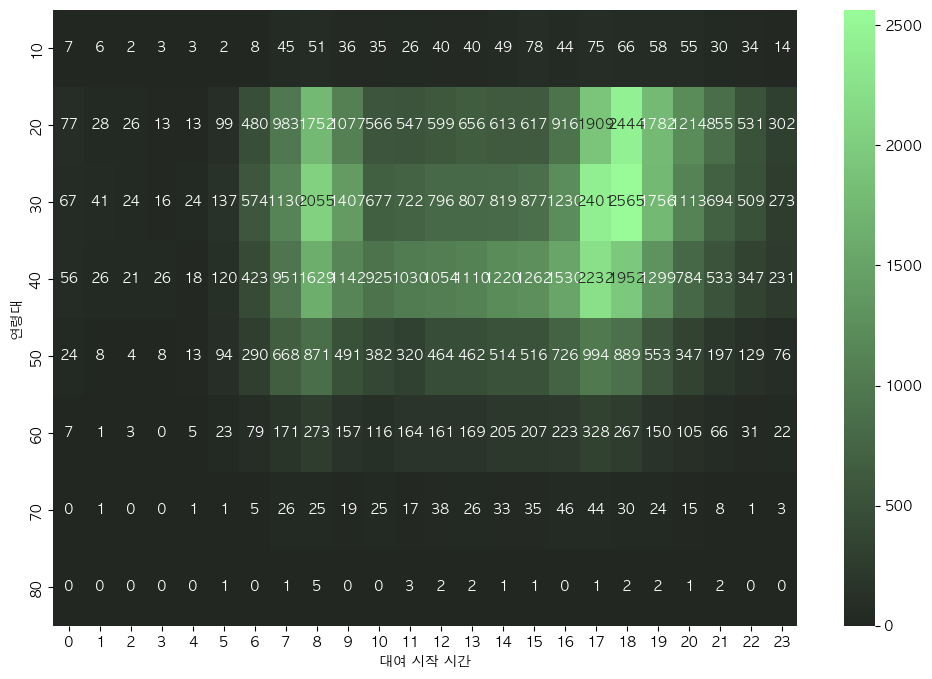

In [312]:
base = df.groupby(['age_bin', 'start_hour'])['bike_id'].count().unstack()

sns.heatmap(base, annot=True, fmt='.0f', cmap=pal)
plt.ylabel('연령대')
plt.xlabel('대여 시작 시간')
plt.show()

# 분석 
1. 가장 많이 이용하는 시간대 : 08-09시, 18-19시 (출퇴근 시간대)
2. 가장 많이 이용하는 연령대 : 20-40 대 전체적으로 이용빈도 높음
3. 이용 패턴 : 주로 출퇴근 시간대 20대 - 40대 이용률 높음
4. 비활성 시간대 : 0시-05시 전 연련층에서 사용량 거의 없음

# 인사이트

1. 00시 - 05시 이용률 없음  
   ➡️ 이 시간대에 자전거 정비 및 관리 작업 집중 수행  
   ➡️ 자전거 이용 시작 지역으로 재배치

2. 40대 이상의 이용률 낮음  
   ➡️ 40대 이상 대상으로 한 이용 안내 가이드 제공 ( ex. 앱 내 사용법 영상 제공 )  

3. 여성 유저가 남성 유저보다 적음  
   ➡️ 원인 파악 우선  
   ➡️ 만약, 원인이 "안전"일 경우, 안전을 보장할 수 있는 기능 제공 ( ex. 라이딩 경로 실시간 공유 )

   
   